In [ ]:
'''
Downlaod wind power dataset form kaggle:https://www.kaggle.com/datasets/theforcecoder/wind-power-forecasting
1-data cleaning consists of 
** drop_duplicate, 
** select important features (using corrolation function), 
** handel missing values (using interpolate function), 
** normalize data wtih MinMaxScaler() function
2-data modelling with regression modelling
'''

In [85]:
#!pip install missingno
import os
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [86]:
df = pd.read_csv(r'Turbine_Data.csv', parse_dates=['Unnamed: 0'], header = 0)
df.head()
print(df.shape)

(118224, 22)


In [87]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
ActivePower,94750.0,619.11,611.28,-38.52,79.64,402.65,1074.59,1779.03
AmbientTemperatue,93817.0,28.77,4.37,0.00,25.63,28.34,31.66,42.41
BearingShaftTemperature,62518.0,43.01,5.55,0.00,39.84,42.91,47.01,55.09
Blade1PitchAngle,41996.0,9.75,20.64,-43.16,-0.94,0.39,8.10,90.14
Blade2PitchAngle,41891.0,10.04,20.27,-26.44,-0.43,0.89,8.48,90.02
Blade3PitchAngle,41891.0,10.04,20.27,-26.44,-0.43,0.89,8.48,90.02
ControlBoxTemperature,62160.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GearboxBearingTemperature,62540.0,64.23,10.46,0.00,57.87,64.83,71.08,82.24
GearboxOilTemperature,62438.0,57.56,6.32,0.00,53.94,57.20,61.31,70.76
GeneratorRPM,62295.0,1102.03,528.06,0.00,1029.81,1124.86,1515.40,1809.94


In [88]:
df.drop_duplicates(inplace = True)
df.drop(columns = ['WTG','ControlBoxTemperature','Unnamed: 0'], inplace = True)

In [89]:
df.isnull().sum()

ActivePower                     23474
AmbientTemperatue               24407
BearingShaftTemperature         55706
Blade1PitchAngle                76228
Blade2PitchAngle                76333
Blade3PitchAngle                76333
GearboxBearingTemperature       55684
GearboxOilTemperature           55786
GeneratorRPM                    55929
GeneratorWinding1Temperature    55797
GeneratorWinding2Temperature    55775
HubTemperature                  55818
MainBoxTemperature              55717
NacellePosition                 45946
ReactivePower                   23476
RotorRPM                        56097
TurbineStatus                   55316
WindDirection                   45946
WindSpeed                       23629
dtype: int64

<Axes: >

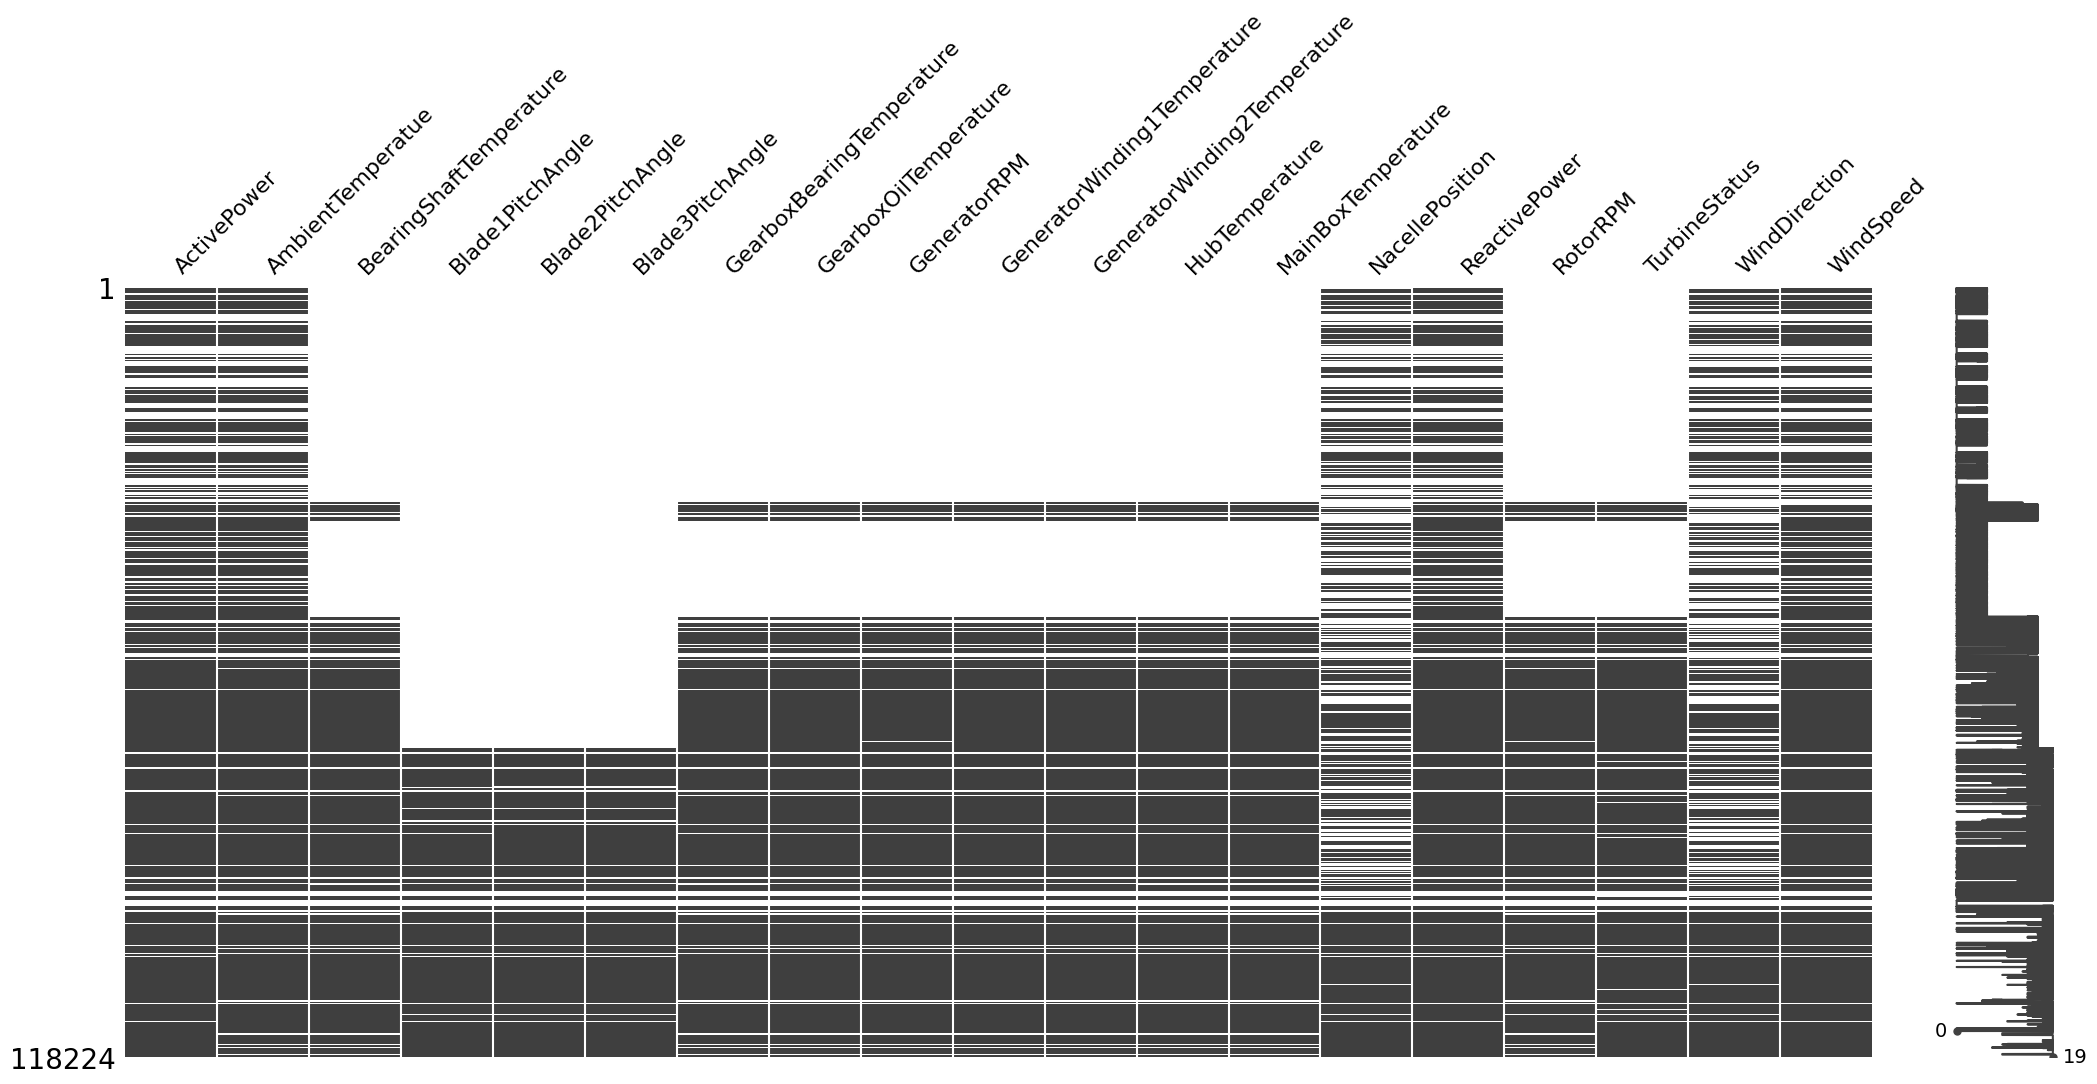

In [90]:
msno.matrix(df)

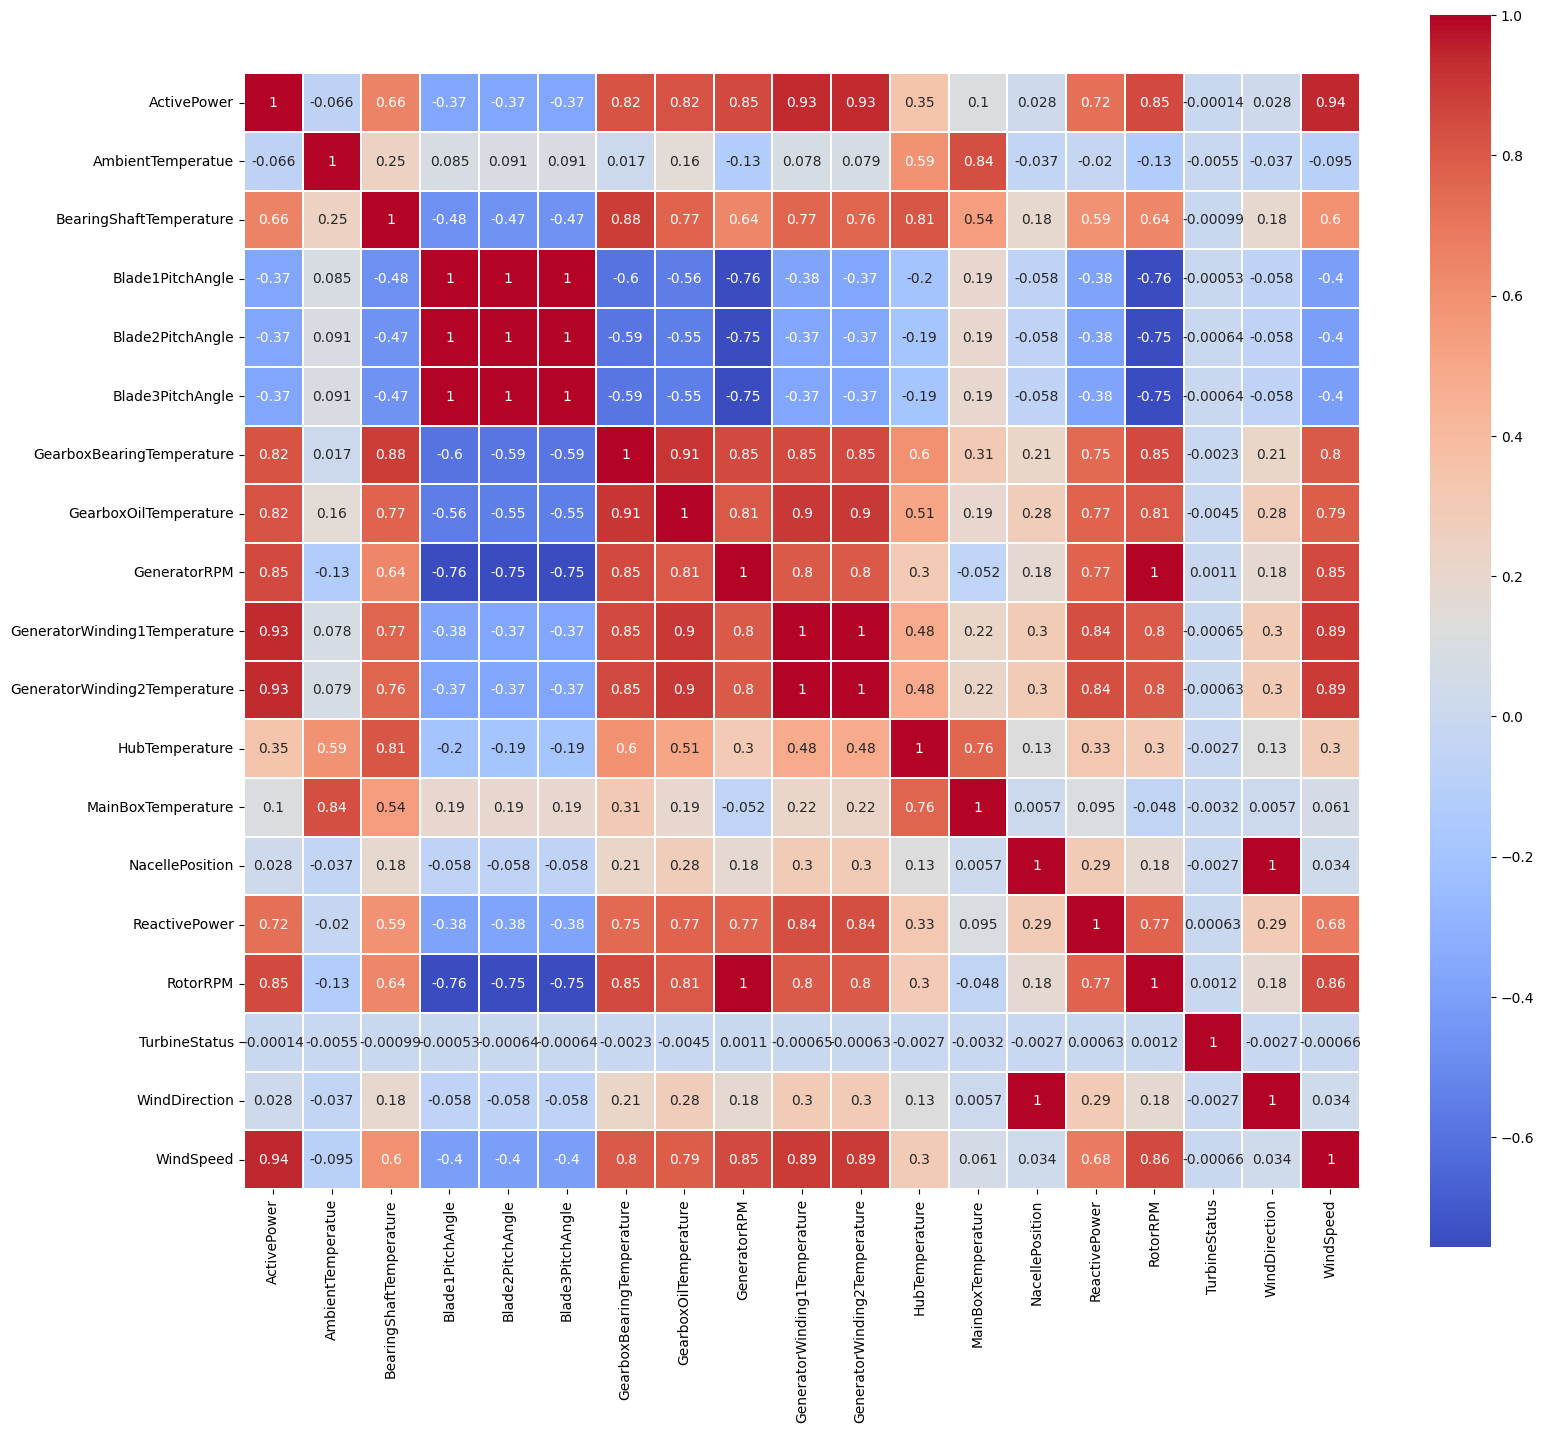

In [91]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(),square=True,annot=True,linewidths=0.1,cmap="coolwarm")
plt.show()

In [95]:
df.corr().sort_values("ActivePower",ascending=False)["ActivePower"]

ActivePower                     1.000000
WindSpeed                       0.940390
GeneratorWinding2Temperature    0.932521
GeneratorWinding1Temperature    0.931390
GeneratorRPM                    0.849604
RotorRPM                        0.849069
GearboxOilTemperature           0.821921
GearboxBearingTemperature       0.818850
ReactivePower                   0.719092
BearingShaftTemperature         0.655400
HubTemperature                  0.347363
MainBoxTemperature              0.101627
NacellePosition                 0.028108
WindDirection                   0.028108
TurbineStatus                  -0.000135
AmbientTemperatue              -0.065637
Blade2PitchAngle               -0.367978
Blade3PitchAngle               -0.367978
Blade1PitchAngle               -0.368997
Name: ActivePower, dtype: float64

<Axes: >

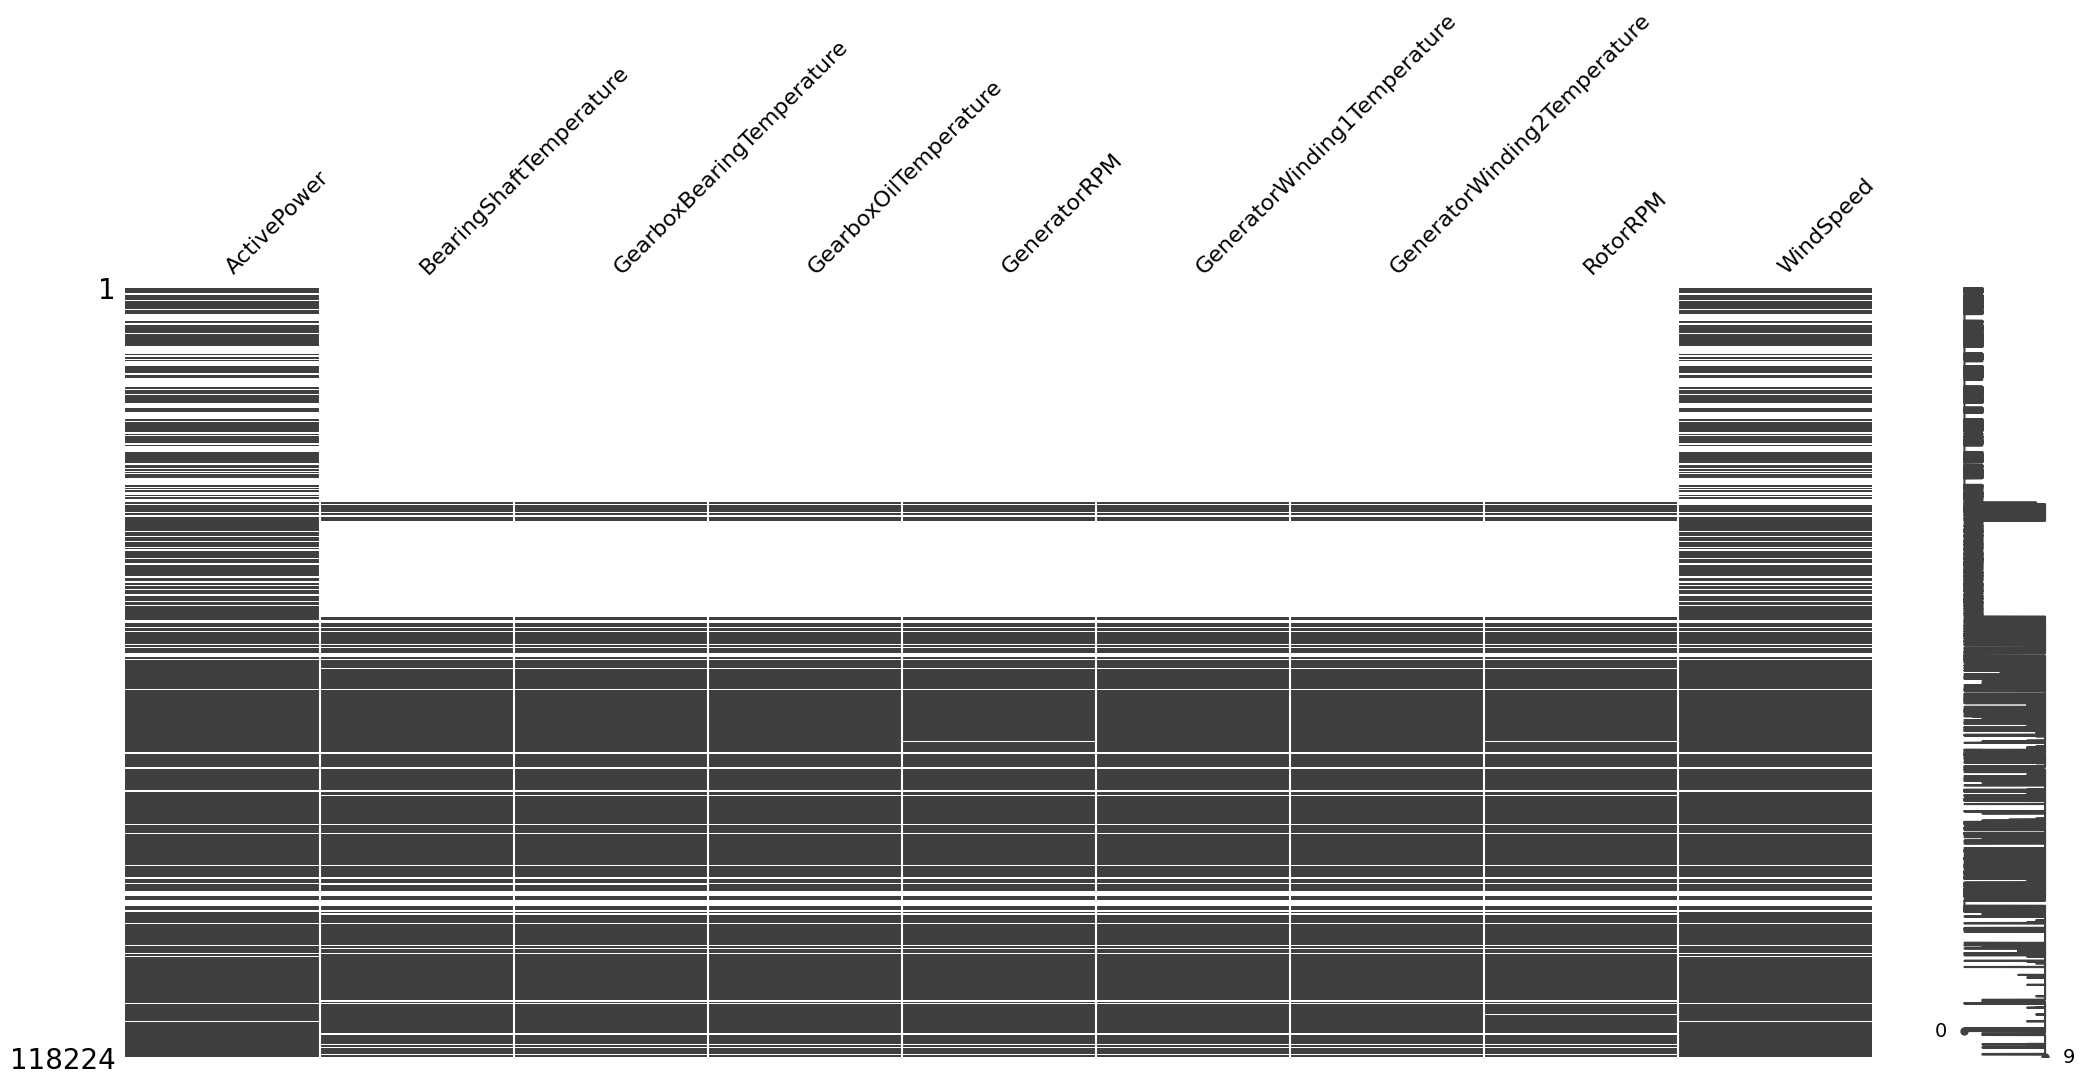

In [96]:
selected_columns=['ActivePower','BearingShaftTemperature' ,'GearboxBearingTemperature',
 'GearboxOilTemperature' ,'GeneratorRPM' ,'GeneratorWinding1Temperature',
 'GeneratorWinding2Temperature' , 'RotorRPM' ,'WindSpeed']
msno.matrix(df[selected_columns])

In [97]:
df_selected=pd.DataFrame(df[selected_columns])
for n in selected_columns[1:]:
    df_selected[n]=df_selected[n].interpolate(method='linear',limit_direction='both')

In [98]:
 df_selected.isnull().sum()

ActivePower                     23474
BearingShaftTemperature             0
GearboxBearingTemperature           0
GearboxOilTemperature               0
GeneratorRPM                        0
GeneratorWinding1Temperature        0
GeneratorWinding2Temperature        0
RotorRPM                            0
WindSpeed                           0
dtype: int64

In [99]:
df_selected.dropna(axis=0,how = 'any',inplace = True)
print(df_selected.isnull().sum())

ActivePower                     0
BearingShaftTemperature         0
GearboxBearingTemperature       0
GearboxOilTemperature           0
GeneratorRPM                    0
GeneratorWinding1Temperature    0
GeneratorWinding2Temperature    0
RotorRPM                        0
WindSpeed                       0
dtype: int64


In [100]:
y_selected =pd.DataFrame(df_selected['ActivePower'])
X_selected=df_selected.drop(columns = 'ActivePower')

In [103]:
X_selected_norm = MinMaxScaler().fit_transform(X_selected)

In [15]:
X_selected_norm.to_csv("data-new.data", index=True)
y_selected.to_csv("label-new.data", index=True)

In [18]:
def create_folder_and_save_files(X, y, block_size=1008):
  # Create the 'Data' folder if it doesn't exist
  data_folder = "Data"
  os.makedirs(data_folder, exist_ok=True)

  num_blocks = len(X) // block_size

  for block in range(num_blocks):
    start_idx = block * block_size
    end_idx = start_idx + block_size
    data_new = X.iloc[start_idx:end_idx]
    label_new = y.iloc[start_idx:end_idx]

    # Create a subfolder with the block number as its name within 'Data'
    folder_name = os.path.join(data_folder, f"block_{block}")
    os.makedirs(folder_name, exist_ok=True)

    # Create unique filenames within the block folder
    data_filename = os.path.join(folder_name, "data.data")
    label_filename = os.path.join(folder_name, "label.data")

    # Save data and labels using a more efficient CSV writing method
    data_new.to_csv(data_filename, index=False)
    label_new.to_csv(label_filename, index=False)

In [106]:
x_train, x_test, y_train, y_test = train_test_split(X_selected_norm,y_selected, test_size=0.25, random_state=1)
clf = LinearRegression()
clf.fit(x_train, y_train)
pred_train = clf.predict(x_train)
pred_test = clf.predict(x_test)
print("Test Evaluation:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_test)))
print("R^2:", r2_score(y_test, pred_test))
print("Train Evaluation:")
print("RMSE:", np.sqrt(mean_squared_error(y_train, pred_train)))
print("R^2:", r2_score(y_train, pred_train))

Test Evaluation:
RMSE: 197.5743257487447
R^2: 0.8960019103515292
Train Evaluation:
RMSE: 194.2435763306224
R^2: 0.8988692352409811
